In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_merged = pd.read_excel('Time analysis - Competitor Tracker.xlsx', sheet_name = 'Merged')

In [ ]:
df_merged

,Competitor Name,URL,Likes,Comments,Caption,Format,Theme,Subtheme,Topic,Summary,Timestamp UTC,Timestamp IST,Unnamed: 12
0,Saheli Chatterjee,https://www.linkedin.com/posts/saheli-chatterj...,1123.0,151.0,🔥🐉 DRAGONS AND FREELANCING?! 🐉🔥\n \n 👑 Hear ye...,IMAGE,Innovative Approach to Freelancing with a Touc...,Embracing Strength and Resilience for Freelanc...,Unleash Your Creative Fire: Embracing a Dragon...,Explore the captivating blend of fantasy and m...,"Fri, 04 Aug 2023 10:37:56 AM UTC","Fri, 04 Aug 2023 04:07:56 PM IST",NaN
1,NaN,https://www.linkedin.com/posts/saheli-chatterj...,3834.0,471.0,I am going to read 21 books in August. 📚\n \n ...,IMAGE,Rekindling the Passion for Reading and Setting...,"Balancing Business, Personal Growth, and Readi...",Rediscovering the Joy of Reading: Navigating A...,Dive into the journey of a reader's rekindled ...,"Thu, 03 Aug 2023 11:45:00 AM UTC","Thu, 03 Aug 2023 05:15:00 PM IST",NaN
2,NaN,https://www.linkedin.com/posts/saheli-chatterj...,2803.0,318.0,"My August Goals, broken down :\n \n Work & Pro...",IMAGE,Ambitious Pursuits and Personal Growth: Naviga...,Balancing Professional and Personal Aspiration...,"August Aspirations: Conquering Goals, Cultivat...",Unveil the intricate tapestry of goals set for...,"Tue, 01 Aug 2023 11:19:13 AM UTC","Tue, 01 Aug 2023 04:49:13 PM IST",NaN
3,NaN,https://www.linkedin.com/posts/saheli-chatterj...,1772.0,204.0,You may think becoming a High-income freelance...,IMAGE,Embracing Humble Origins on the Path to Freela...,Highlighting the Significance of Work Ethic an...,From Humble Beginnings to High-Income Freelanc...,Immerse yourself in the evolution of a freelan...,"Sun, 30 Jul 2023 10:27:18 AM UTC","Sun, 30 Jul 2023 03:57:18 PM IST",NaN
4,NaN,https://www.linkedin.com/posts/saheli-chatterj...,2896.0,310.0,So I come across this kind of post often.\n \n...,IMAGE,Breaking Barriers and Defying Privilege in Cre...,Championing Self-Taught Success and Confrontin...,Smashing Stereotypes: Rise of the Self-Taught ...,Engage with the post's candid exploration of c...,"Fri, 28 Jul 2023 11:06:27 AM UTC","Fri, 28 Jul 2023 04:36:27 PM IST",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,NaN,https://www.linkedin.com/posts/saakshijadhav_i...,240.0,48.0,I took 5 flights last month!\n\nEvery flight I...,Image,The Power of Disconnection for Creative Inspir...,Finding Ideas Within and Fostering Originality,"Creative inspiration, disconnection, nurturing...","During five flights, the author disconnected f...","Mon, 19 Jun 2023 04:53:35 AM UTC","Mon, 19 Jun 2023 10:23:35 AM IST",NaN
356,NaN,https://www.linkedin.com/posts/saakshijadhav_w...,368.0,108.0,"“Work smart not hard, Saakshi!”\n\nI took my d...",Image,Embracing Growth through Hiring Exceptional T...,Leveraging Diverse Skills and Perspectives,"Hiring exceptional team members, fostering po...","Following her dad's advice, the author hired ...","Fri, 09 Jun 2023 04:30:50 AM UTC","Fri, 09 Jun 2023 10:00:50 AM IST",NaN
357,NaN,https://www.linkedin.com/posts/saakshijadhav_i...,260.0,71.0,I studied the TOP 1% accounts on LINKEDIN so y...,Image,LinkedIn Insights from Top 1% Accounts,Winning Strategies for Engaging Content,"LinkedIn content insights, engagement strateg...",Studying the top 1% LinkedIn accounts revealed...,"Thu, 08 Jun 2023 11:33:42 AM UTC","Thu, 08 Jun 2023 05:03:42 PM IST",NaN
358,NaN,https://www.linkedin.com/posts/saakshijadhav_s...,306.0,52.0,"Stop, everything you see on LinkedIn is not th...",Image,The Realities of Entrepreneurship vs. Social M...,: Embracing Challenges and Sharing Authentic E...,"Entrepreneurship realities, social media portr...",Despite the glamorous portrayal of entrepreneu...,"Wed, 07 Jun 2023 04:11:27 AM UTC","Wed, 07 Jun 2023 09:41:27 AM IST",NaN


In [ ]:
df_merged.dropna(how='all', inplace=True)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 359
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Competitor Name  15 non-null     object 
 1   URL              344 non-null    object 
 2   Likes            343 non-null    float64
 3   Comments         337 non-null    float64
 4   Caption          344 non-null    object 
 5   Format           302 non-null    object 
 6   Theme            317 non-null    object 
 7   Subtheme         317 non-null    object 
 8   Topic            314 non-null    object 
 9   Summary          317 non-null    object 
 10  Timestamp UTC    344 non-null    object 
 11  Timestamp IST    344 non-null    object 
 12  Unnamed: 12      2 non-null      object 
dtypes: float64(2), object(11)
memory usage: 37.6+ KB


In [ ]:
df_merged['Competitor Name'].fillna(method='ffill', inplace=True)

In [ ]:
import re
from datetime import datetime, timezone, timedelta
import pandas as pd

def get_post_id(url):
    if not isinstance(url, str):
        return None
    match = re.search(r'([0-9]{19})', url)
    if match:
        return match.group(1)
    return None

def extract_unix_timestamp(post_id):
    as_binary = bin(int(post_id))[2:]
    first41_chars = as_binary[:41]
    timestamp = int(first41_chars, 2)
    return timestamp

def unix_timestamp_to_human_date(timestamp, to_ist):
    timestamp = timestamp / 1000
    utc_time = datetime.fromtimestamp(timestamp, tz=timezone.utc)
    if to_ist:
        ist_time = utc_time + timedelta(hours=5, minutes=30)
        return ist_time.strftime('%a, %d %b %Y %I:%M:%S %p IST')
    else:
        return utc_time.strftime('%a, %d %b %Y %I:%M:%S %p UTC')

def process_xlsx_file(dataframe):
    df = dataframe

    if 'Timestamp UTC' not in df.columns:
        df['Timestamp UTC'] = None
    if 'Timestamp IST' not in df.columns:
        df['Timestamp IST'] = None

    for idx, row in df.iterrows():
        if pd.notna(row['URL']):
            post_id = get_post_id(row['URL'])
            if post_id:
                unix_timestamp = extract_unix_timestamp(post_id)
                df.at[idx, 'Timestamp UTC'] = unix_timestamp_to_human_date(unix_timestamp, to_ist=False)
                df.at[idx, 'Timestamp IST'] = unix_timestamp_to_human_date(unix_timestamp, to_ist=True)

    return df

result_df = process_xlsx_file(df_merged)
# display(result_df)

,Competitor Name,URL,Likes,Comments,Caption,Format,Theme,Subtheme,Topic,Summary,Timestamp UTC,Timestamp IST,Unnamed: 12
0,Saheli Chatterjee,https://www.linkedin.com/posts/saheli-chatterj...,1123.0,151.0,🔥🐉 DRAGONS AND FREELANCING?! 🐉🔥\n \n 👑 Hear ye...,IMAGE,Innovative Approach to Freelancing with a Touc...,Embracing Strength and Resilience for Freelanc...,Unleash Your Creative Fire: Embracing a Dragon...,Explore the captivating blend of fantasy and m...,"Fri, 04 Aug 2023 10:37:56 AM UTC","Fri, 04 Aug 2023 04:07:56 PM IST",NaN
1,Saheli Chatterjee,https://www.linkedin.com/posts/saheli-chatterj...,3834.0,471.0,I am going to read 21 books in August. 📚\n \n ...,IMAGE,Rekindling the Passion for Reading and Setting...,"Balancing Business, Personal Growth, and Readi...",Rediscovering the Joy of Reading: Navigating A...,Dive into the journey of a reader's rekindled ...,"Thu, 03 Aug 2023 11:45:00 AM UTC","Thu, 03 Aug 2023 05:15:00 PM IST",NaN
2,Saheli Chatterjee,https://www.linkedin.com/posts/saheli-chatterj...,2803.0,318.0,"My August Goals, broken down :\n \n Work & Pro...",IMAGE,Ambitious Pursuits and Personal Growth: Naviga...,Balancing Professional and Personal Aspiration...,"August Aspirations: Conquering Goals, Cultivat...",Unveil the intricate tapestry of goals set for...,"Tue, 01 Aug 2023 11:19:13 AM UTC","Tue, 01 Aug 2023 04:49:13 PM IST",NaN
3,Saheli Chatterjee,https://www.linkedin.com/posts/saheli-chatterj...,1772.0,204.0,You may think becoming a High-income freelance...,IMAGE,Embracing Humble Origins on the Path to Freela...,Highlighting the Significance of Work Ethic an...,From Humble Beginnings to High-Income Freelanc...,Immerse yourself in the evolution of a freelan...,"Sun, 30 Jul 2023 10:27:18 AM UTC","Sun, 30 Jul 2023 03:57:18 PM IST",NaN
4,Saheli Chatterjee,https://www.linkedin.com/posts/saheli-chatterj...,2896.0,310.0,So I come across this kind of post often.\n \n...,IMAGE,Breaking Barriers and Defying Privilege in Cre...,Championing Self-Taught Success and Confrontin...,Smashing Stereotypes: Rise of the Self-Taught ...,Engage with the post's candid exploration of c...,"Fri, 28 Jul 2023 11:06:27 AM UTC","Fri, 28 Jul 2023 04:36:27 PM IST",NaN


In [ ]:
df_merged.drop(columns = ['Unnamed: 12'], inplace = True)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 359
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Competitor Name  344 non-null    object 
 1   URL              344 non-null    object 
 2   Likes            343 non-null    float64
 3   Comments         337 non-null    float64
 4   Caption          344 non-null    object 
 5   Format           302 non-null    object 
 6   Theme            317 non-null    object 
 7   Subtheme         317 non-null    object 
 8   Topic            314 non-null    object 
 9   Summary          317 non-null    object 
 10  Timestamp UTC    344 non-null    object 
 11  Timestamp IST    344 non-null    object 
dtypes: float64(2), object(10)
memory usage: 43.0+ KB


In [ ]:
df_merged['Comments'].fillna(0, inplace=True)
df_merged['Likes'].fillna(0, inplace=True)

In [ ]:
from datetime import datetime

df_merged['Timestamp IST'] = df_merged['Timestamp IST'].apply(lambda x: x.replace(' IST', ''))
df_merged['Timestamp IST'] = pd.to_datetime(df_merged['Timestamp IST'], format='%a, %d %b %Y %I:%M:%S %p')

In [ ]:
df_merged.sort_values(by='Timestamp IST', ascending=True, inplace=True)

In [ ]:
df_merged.reset_index(drop=True, inplace=True)

In [ ]:
competitor_followers = {}

# Get unique competitor names from the DataFrame
unique_competitors = df_merged['Competitor Name'].unique()

# Prompt the user to input follower count for each competitor
for competitor in unique_competitors:
    follower_count = input(f"Enter follower count for {competitor}: ")
    competitor_followers[competitor] = int(follower_count)

print(competitor_followers)

Enter follower count for Sakthi Ektha N: 9854
Enter follower count for Kaur Bhawna: 12461
Enter follower count for Ketaki Mehta: 5210
Enter follower count for Pankhuri Gupta: 21595
Enter follower count for Anushka Rathore: 5336
Enter follower count for Manish Pandey: 51826
Enter follower count for MISHKA RANA: 122131
Enter follower count for Saakshi Jadhav: 22716
Enter follower count for Saheli Chatterjee: 205640
Enter follower count for Shruti Tyagi: 9682
Enter follower count for Yogesh Agarwal: 16661
Enter follower count for Fiza Kasim: 19398
Enter follower count for Aaina Chopra: 75235
Enter follower count for Devan Bhalla: 99050
Enter follower count for Nataraj Sasid: 133800
{'Sakthi Ektha N': 9854, 'Kaur Bhawna': 12461, 'Ketaki Mehta': 5210, 'Pankhuri Gupta': 21595, 'Anushka Rathore': 5336, 'Manish Pandey': 51826, 'MISHKA RANA': 122131, 'Saakshi Jadhav': 22716, 'Saheli Chatterjee': 205640, 'Shruti Tyagi': 9682, 'Yogesh Agarwal': 16661, 'Fiza Kasim': 19398, 'Aaina Chopra': 75235, '

In [ ]:
df_merged['Followers'] = df_merged['Competitor Name'].apply(lambda name: competitor_followers.get(name))
df_merged

,Competitor Name,URL,Likes,Comments,Caption,Format,Theme,Subtheme,Topic,Summary,Timestamp UTC,Timestamp IST,Like/Comments Ratio,Followers
0,Sakthi Ektha N,https://www.linkedin.com/posts/sakthiektha_gra...,551.0,136.0,Officially Graduated!\n\n3 years of learning a...,Image,Celebrating Graduation and Personal Growth,Embracing Experiences and Life Lessons,Navigating the College Journey and Beyond,With a mix of happy and challenging experience...,"Mon, 19 Sep 2022 11:09:01 AM UTC",2022-09-19 16:39:01,4.051173,9854
1,Kaur Bhawna,https://www.linkedin.com/posts/kaur-bhawna-8b3...,249.0,39.0,Girls are meant to do household chores.\n \n L...,IMAGE,NaN,NaN,NaN,NaN,"Sun, 18 Dec 2022 12:24:14 PM UTC",2022-12-18 17:54:14,6.382979,12461
2,Kaur Bhawna,https://www.linkedin.com/posts/kaur-bhawna-8b3...,61.0,17.0,Can a 12th pass be a software developer?\n \n ...,IMAGE,NaN,NaN,NaN,NaN,"Mon, 19 Dec 2022 04:13:30 AM UTC",2022-12-19 09:43:30,3.586126,12461
3,Kaur Bhawna,https://www.linkedin.com/posts/kaur-bhawna-8b3...,61.0,22.0,Not only businesses but employees also need to...,TEXT,NaN,NaN,NaN,NaN,"Mon, 19 Dec 2022 03:53:57 PM UTC",2022-12-19 21:23:57,2.771468,12461
4,Kaur Bhawna,https://www.linkedin.com/posts/kaur-bhawna-8b3...,45.0,12.0,What do you think?\n \n comment below 🙂\n \n #...,IMAGE,NaN,NaN,NaN,NaN,"Tue, 20 Dec 2022 06:25:41 AM UTC",2022-12-20 11:55:41,3.746878,12461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Fiza Kasim,https://www.linkedin.com/posts/fizakazim_perso...,599.0,154.0,"Honestly,I don't take any new projects that pa...",IMAGE,Freelancing and Personal Growth,Setting Boundaries and Value,Elevating My Freelance Game: Setting Minimum P...,"In this post, the author discusses their decis...","Sat, 05 Aug 2023 04:19:27 AM UTC",2023-08-05 09:49:27,3.889358,19398
340,Manish Pandey,https://www.linkedin.com/posts/join2manish_con...,173.0,34.0,YouTube Observation:\n\nViews for almost all t...,Text,Changing Trends in YouTube Content Consumption,Shift in Viewer Behavior,Declining Views for Finance and Case Study Co...,The post observes a significant change in vie...,"Sat, 05 Aug 2023 04:39:04 AM UTC",2023-08-05 10:09:04,5.086739,51826
341,MISHKA RANA,https://www.linkedin.com/feed/update/urn:li:ac...,77.0,15.0,🌟 Reflecting on an inspiring session with Ms. ...,Image,Learning and Inspiration,Learning from Experts,Reflection on Inspiring Session with Ms. MISHK...,This post highlights a recent session with Ms....,"Sat, 05 Aug 2023 07:48:40 AM UTC",2023-08-05 13:18:40,5.129913,122131
342,Aaina Chopra,https://www.linkedin.com/posts/writeraainachop...,385.0,54.0,"Over the weekend, I met one of my friends and ...",Image,Embracing Gratitude and Life's Beauty,Finding Joy in the Present,Reflecting on the Gift of Life,"Amid the fast-paced and work-centric life, a s...","Sat, 05 Aug 2023 07:57:00 AM UTC",2023-08-05 13:27:00,7.128310,75235


In [ ]:
# df_merged['Likes'] = df_merged['Likes'].str.replace(',', '').astype(int)
df_merged['Like/Comments Ratio'] = df_merged['Likes']/(df_merged['Comments']+0.01)
df_merged['New_Engagement_Rate'] = (df_merged['Likes'] + df_merged['Like/Comments Ratio'].mean()*10*df_merged['Comments']) / df_merged['Followers']
df_merged = df_merged[df_merged['Timestamp IST'] >= '2022-10-01']

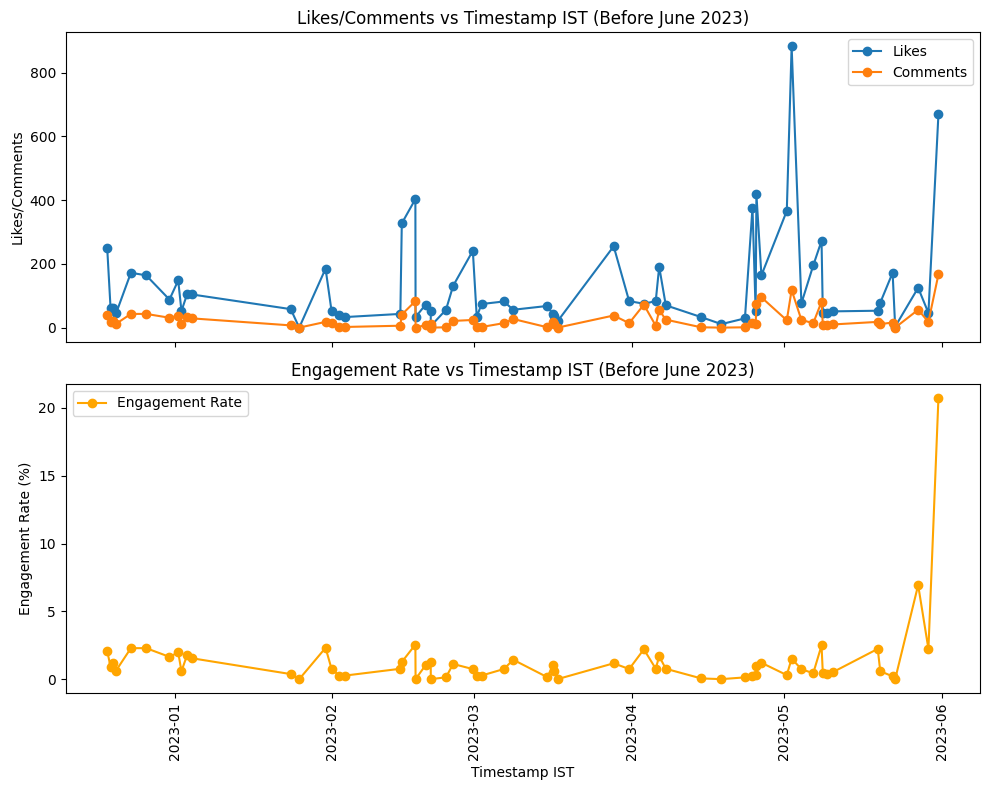

In [ ]:
# Split DataFrame into before and after June 2023
df_before_june = df_merged[df_merged['Timestamp IST'] < '2023-06-01']
df_after_june = df_merged[df_merged['Timestamp IST'] >= '2023-06-01']

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot Likes and Comments before June 2023
ax1.plot(df_before_june['Timestamp IST'], df_before_june['Likes'], marker='o', label='Likes')
ax1.plot(df_before_june['Timestamp IST'], df_before_june['Comments'], marker='o', label='Comments')
ax1.set_ylabel('Likes/Comments')
ax1.set_title('Likes/Comments vs Timestamp IST (Before June 2023)')
ax1.legend()

# Plot Engagement Rate before June 2023
ax2.plot(df_before_june['Timestamp IST'], df_before_june['New_Engagement_Rate'], marker='o', color='orange', label='Engagement Rate')
ax2.set_xlabel('Timestamp IST')
ax2.set_ylabel('Engagement Rate (%)')
ax2.set_title('Engagement Rate vs Timestamp IST (Before June 2023)')
ax2.legend()

# Tilt x-axis tick labels
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


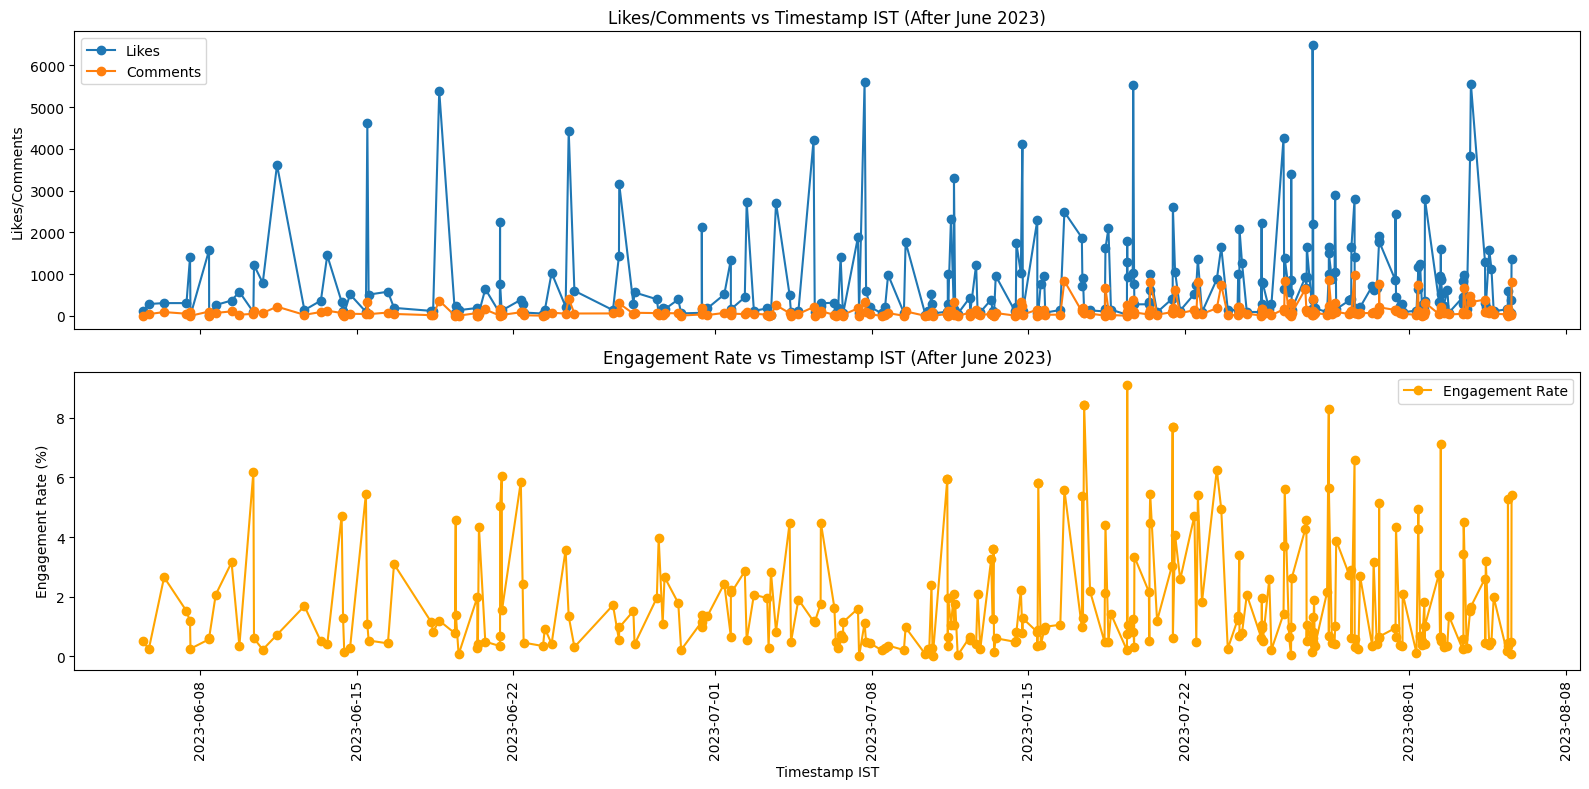

In [ ]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 8))

# Plot Likes and Comments after June 2023
ax1.plot(df_after_june['Timestamp IST'], df_after_june['Likes'], marker='o', label='Likes')
ax1.plot(df_after_june['Timestamp IST'], df_after_june['Comments'], marker='o', label='Comments')
ax1.set_ylabel('Likes/Comments')
ax1.set_title('Likes/Comments vs Timestamp IST (After June 2023)')
ax1.legend()

# Plot Engagement Rate after June 2023
ax2.plot(df_after_june['Timestamp IST'], df_after_june['New_Engagement_Rate'], marker='o', color='orange', label='Engagement Rate')
ax2.set_xlabel('Timestamp IST')
ax2.set_ylabel('Engagement Rate (%)')
ax2.set_title('Engagement Rate vs Timestamp IST (After June 2023)')
ax2.legend()

# Tilt x-axis tick labels
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-34-fabc9098a7f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Time Window'] = df_merged['Timestamp IST'].apply(categorize_time)


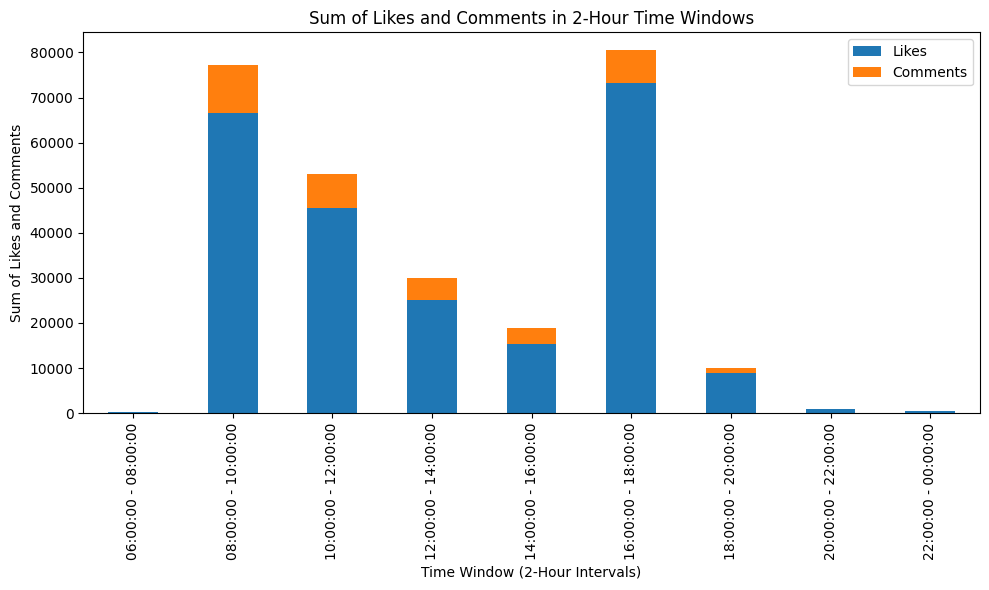

In [ ]:
# Define 2-hour time windows
time_windows = pd.date_range(start='00:00:00', end='23:59:59', freq='2H').time

# Create a custom function to categorize timestamps into 2-hour time windows
def categorize_time(timestamp):
    for i in range(len(time_windows) - 1):
        if time_windows[i] <= timestamp.time() < time_windows[i + 1]:
            return f"{time_windows[i]} - {time_windows[i + 1]}"
    return f"{time_windows[-1]} - {time_windows[0]}"

# Apply the categorization function to create a new column 'Time Window'
df_merged['Time Window'] = df_merged['Timestamp IST'].apply(categorize_time)

# Calculate sum of Likes and Comments within each time window
df_grouped = df_merged.groupby('Time Window')[['Likes', 'Comments']].sum()

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Time Window (2-Hour Intervals)')
ax.set_ylabel('Sum of Likes and Comments')
ax.set_title('Sum of Likes and Comments in 2-Hour Time Windows')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-35-7f9242a47dbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Timestamp IST'] = pd.to_datetime(df_merged['Timestamp IST'])
<ipython-input-35-7f9242a47dbc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Time Window'] = df_merged['Timestamp IST'].apply(categorize_time)


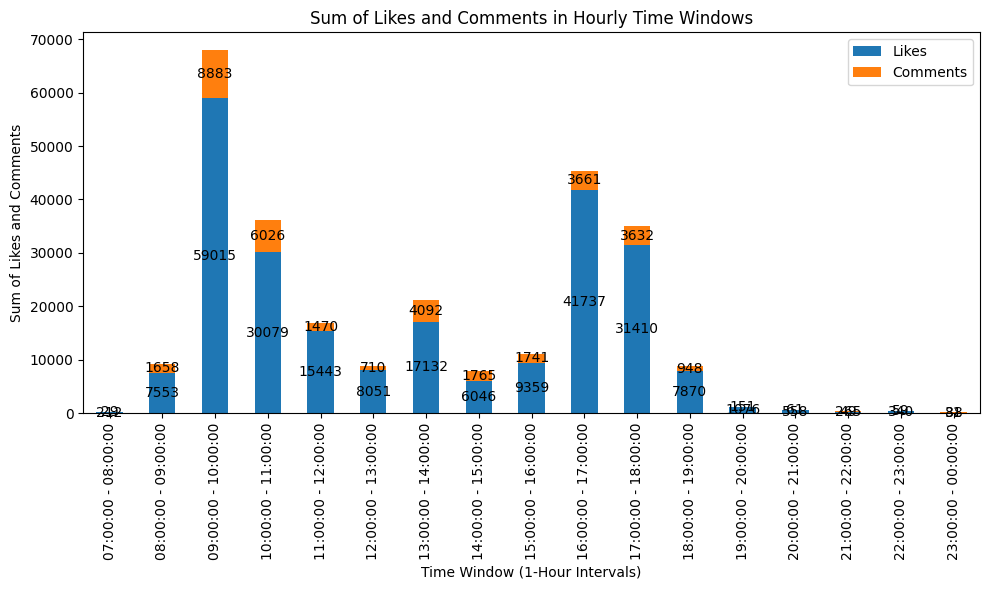

In [ ]:
# Convert Timestamp IST column to datetime
df_merged['Timestamp IST'] = pd.to_datetime(df_merged['Timestamp IST'])

# Define hourly time windows
time_windows = pd.date_range(start='00:00:00', end='23:59:59', freq='1H').time

# Create a custom function to categorize timestamps into hourly time windows
def categorize_time(timestamp):
    for i in range(len(time_windows) - 1):
        if time_windows[i] <= timestamp.time() < time_windows[i + 1]:
            return f"{time_windows[i]} - {time_windows[i + 1]}"
    return f"{time_windows[-1]} - {time_windows[0]}"

# Apply the categorization function to create a new column 'Time Window'
df_merged['Time Window'] = df_merged['Timestamp IST'].apply(categorize_time)

# Calculate sum of Likes and Comments within each time window
df_grouped = df_merged.groupby('Time Window')[['Likes', 'Comments']].sum()

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Time Window (1-Hour Intervals)')
ax.set_ylabel('Sum of Likes and Comments')
ax.set_title('Sum of Likes and Comments in Hourly Time Windows')
plt.xticks(rotation=90)
plt.tight_layout()

# Annotate bars with actual numbers
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='black')

plt.show()

In [ ]:
df_merged['Competitor Name'].nunique()

15